In [2]:
%pylab
%matplotlib inline
import scipy as sp
import librosa
import sounddevice

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%store -r song_data
song, fs = song_data
a = song[1000000:1100000]

In [4]:
win = int(0.003*fs)
overlap = int(0.002*fs)

In [43]:
_, _, s = sp.signal.stft(a, nfft=2048, nperseg=win, noverlap=overlap)
s.shape

(1025, 4547)

In [44]:
sxx = s[::200, :, None] @ s[::200, None, :].conjugate() 
sxx.shape

(6, 4547, 4547)

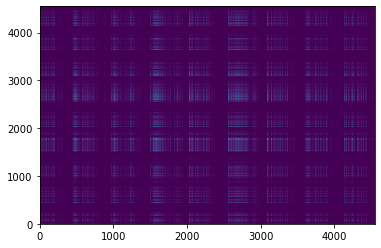

In [45]:
pcolormesh(abs(sxx).sum(axis=0))

In [47]:
_, rxx = sp.signal.istft(sxx[:, :, ::500], nperseg=win, noverlap=overlap, nfft=2048, time_axis=1, freq_axis=0)
rxx.shape

(100012, 10)

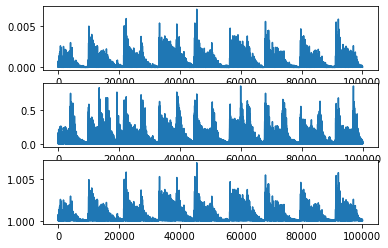

In [48]:
_, axs = subplots(3, 1)
axs[0].plot(abs(rxx).sum(axis=1))
axs[1].plot(abs(a))
axs[2].plot(np.exp(abs(rxx)).prod(axis=1))

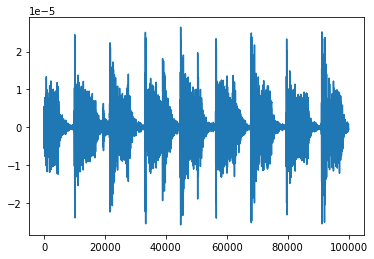

In [54]:
plot(abs(rxx)[1:, 0]-abs(rxx)[:-1, 0])

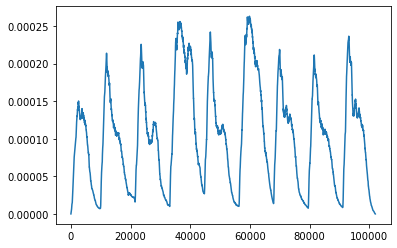

In [64]:
rxxs = np.convolve(abs(rxx)[:, 0], np.ones(2000)/2000)
plot(rxxs)

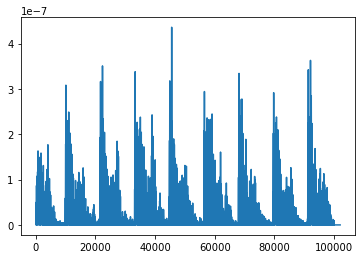

In [68]:
plot(np.where(rxxs[1:]-rxxs[:-1] > 0, rxxs[1:] - rxxs[:-1], 0))

In [60]:
def stft_autocorrelation(arr, corr_window_length, corr_hop_length, stft_window_length, stft_hop_length):
    s = sp.signal.stft(arr, nperseg=stft_window_length, noverlap=(stft_window_length-stft_hop_length))[2]
    
    lag = int(corr_window_length // stft_window_length)
    idx = int(corr_hop_length // stft_window_length)
    n_segs = int((s.shape[1] - lag) // idx)
    sxx = np.array([s[:, i * idx:i * idx + lag, None] 
                    @ s[:, None, i * idx:i * idx + lag].conjugate() 
                    for i in range(n_segs)])

    return abs(sxx)

In [62]:
sxx = stft_autocorrelation(song, int(3*fs), int(2*fs), int(0.03*fs), int(0.01*fs))

In [63]:
sxx.shape

(157, 331, 100, 100)

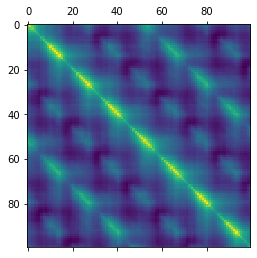

In [73]:
matshow(np.log(sxx.mean(axis=(0, 1))+10e-5))